In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = cv.imread(r'C:\Users\vladk\Desktop\OpenCV\source\Lady.jpg')
blur = 5
kernel = np.ones((blur,blur), np.float32)/(blur*blur)
dst = cv.medianBlur(img, 9)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
dst_rgb = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

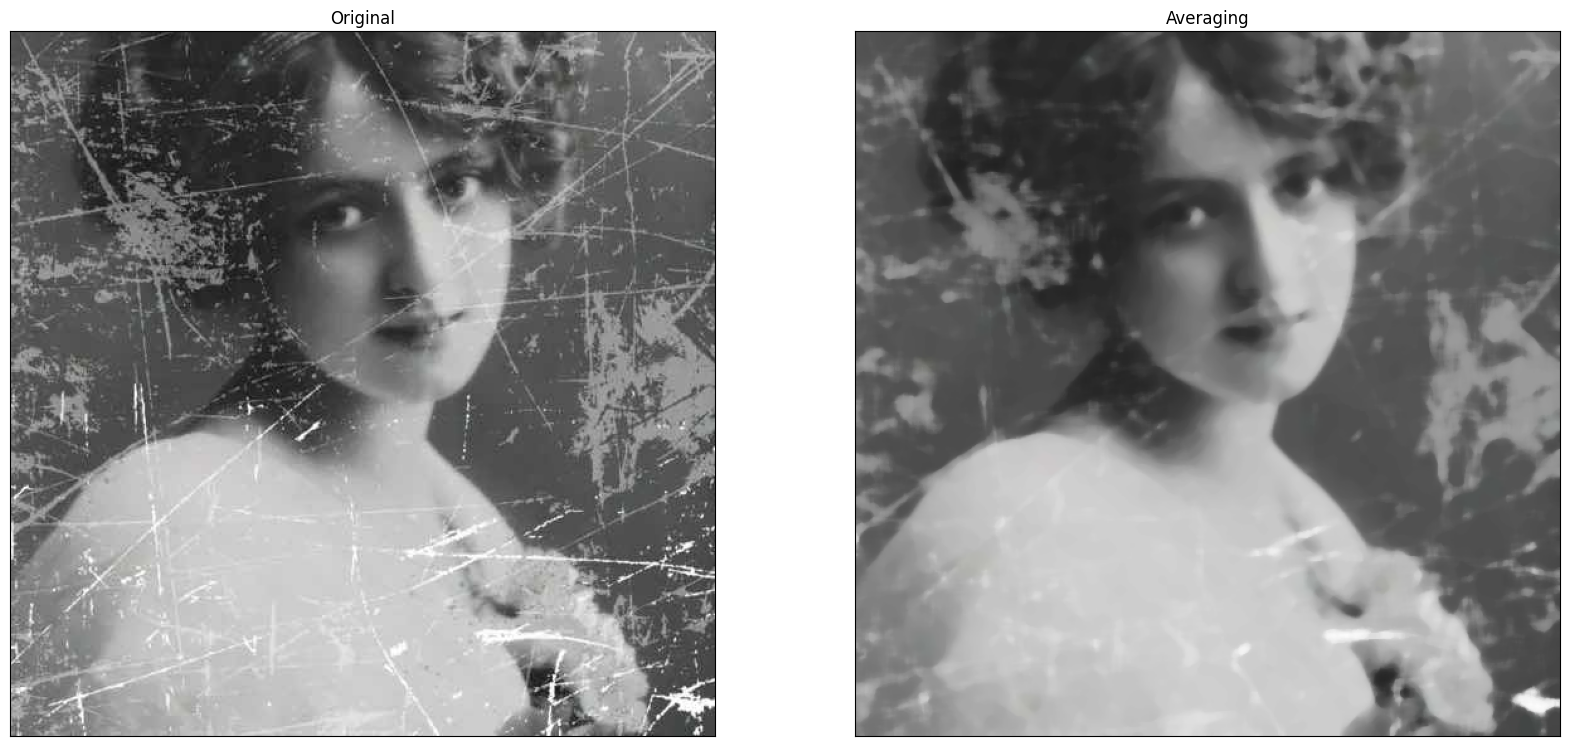

In [3]:
plt.figure(figsize=(20,10))

plt.subplot(121),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_rgb),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
cap = cv.VideoCapture(r'C:\Users\vladk\Desktop\OpenCV\source\video2.mp4')

while(cap.isOpened()):
    # Read each frame
    ret, frame = cap.read()
    
    # Break if no more frames (end of video)
    if not ret:
        break

    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # Define range of blue color in HSV
    lower_blue = np.array([160, 50, 50])
    upper_blue = np.array([180, 255, 255])

    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame, frame, mask=mask)

    # Display the resulting frame, mask, and bitwise operation result
    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)

    # Press 'Esc' to exit the loop
    k = cv.waitKey(30) & 0xFF  # Adjust wait time for the video speed
    if k == 27:
        break

# Release the video capture object and close all windows
cap.release()
cv.destroyAllWindows()